[![](https://velog.velcdn.com/images/hyejinbeck/post/c912c8e7-85ba-425a-a1ec-727f6ba99667/image.png)
![](https://velog.velcdn.com/images/hyejinbeck/post/5b0a2ad7-75f7-4d49-bd5a-752e9f0dc058/image.png)](https://www.jnilbo.com/70601990729)

# 백혜진의 "통매음" 관련 텍스트 데이터 분석 

2025년 5월 5일 수집 데이터 300개 기준 (2025.03.20 13:42 ~ 2025.05.05 21:44)

### 0. 프로젝트 개요 

이 프로젝트는 디시인사이드 웹사이트에서 "통매음"이라는 키워드로 검색되는 게시글을 수집 및 분석하여, <br>
해당 키워드가 실제 법적 문제와 관련된 맥락에서 사용되는 경우가 많은지, 아니면 정신연령이 낮은 이들의 단순한 장난과 같은 표현이 더 많은지 구분하는 것을 목표로 한다. <br>
이를 위해 웹사이트의 검색 결과 HTML을 파싱하여 데이터를 수집하고, 텍스트 전처리 및 형태소 분석을 거친 후, TF-IDF, 상관 분석, 군집 분석 등의 기법을 활용하여 텍스트 분석을 수행한다.

궁극적으로는 이 분석 결과를 바탕으로, <br>
"통매음" 키워드에 대해 실질적인 법률적 수요가 있는 사용자와 단순한 유희 목적의 사용자를 구분함으로써, <br>
키워드 광고 전략과 콘텐츠 마케팅의 방향성을 보다 정교화하는 데 기여하는 것이 본 프로젝트의 실질적인 목적이다.

### 1. 데이터 수집
- 디씨인사이드에서 "통매음" 키워드로 검색된 게시글 수집
   - requests와 BeautifulSoup을 이용한 스크래핑 및 HTML 파싱

### 2. 데이터 전처리
- 정규 표현식 (re)과 람다 함수를 활용한 텍스트 정제
- 날짜 데이터를 dateutil.parser로 변환하고, 요일 추출 (calendar)
- 형태소 분석기 Kiwi를 이용하여 명사만 추출 

### 3. 데이터 분석
#### 3-1. 기초 텍스트 분석
- 다빈도 단어 분석: collections.Counter().most_common()
- 단어 조합 분석 (n-gram): 의미 있는 짝궁 단어 찾기
- 특정 키워드 및 다중 키워드 등장 빈도 분석

#### 3-2. 시각화 및 주요 키워드 분석
- 단어 빈도 시각화 (막대그래프barchart)
- TF-IDF 분석을 통해 게시글별 핵심 키워드 추출
- 상관분석
    - 주요 단어 간 동시 등장 관계 시각화 (heatmap)

#### 3-3. 주제 및 군집 구조 파악
- PCA 분석: 게시글 간 텍스트 유사성 기반 차원 축소
- K-Means 군집분석: 유사한 패턴을 가진 게시글 유형 분류

---

# 1. 데이터 수집 

- 디씨인사이드에서 "통매음" 키워드로 검색된 게시글 수집
   - requests와 BeautifulSoup을 이용한 스크래핑 및 HTML 파싱

In [149]:
import requests
from bs4 import BeautifulSoup

import time 
import pandas as pd

In [150]:
url = 'https://search.dcinside.com/post/p/{}/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C'

In [151]:
for page in range(1,11): 
    print(url.format(page))

https://search.dcinside.com/post/p/1/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/2/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/3/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/4/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/5/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/6/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/7/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/8/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/9/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/10/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C


디시인사이드 게시글 제목 태그는 a.tit_txt <br>
디시인사이드 게시글 내용 태그는 a.link_dsc_txt

In [152]:
response = requests.get(url.format(1))
html = response.text
soup = BeautifulSoup(html, 'lxml')

# print(soup)

# <!DOCTYPE html>
# <html class="darkmode" lang="ko">
# <head>
# <meta charset="utf-8"/>
# <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
# <meta content="kr" name="content-language"/>
# <meta content="8_SyZg2Wg3LNnCmFXzETp7ld4yjZB8ny17m8QsYsLwk" name="google-site-verification"/>
# <meta content="디시인사이드" name="author"/>
# <meta content="디시인사이드 검색결과" name="title"/>
# <meta content="디시인사이드 검색결과" name="description"/>
# <meta content="website" property="og:type"/>
# <meta content="디시인사이드 검색결과" property="og:title"/>
# <meta content="디시인사이드 검색결과" property="og:description"/>

![](https://velog.velcdn.com/images/hyejinbeck/post/e5138aa0-197c-44e0-9a0a-c51f85e93180/image.png)

In [153]:
def find_titles(soup): 
    """게시물 제목을 수집"""
    title_soup = soup.select('a.tit_txt')
    titles = [title.text for title in title_soup]
    return titles

titles = find_titles(soup)
titles[:3]

['스팀프사 할1카스인 새끼 봤는데 정지 왜 안먹냐',
 '근데 남자가 통매음 고소하려하면 돌려보낸다던데',
 '빅보스형 정태우가 보민갓성희롱할때 아우 사이버수사대에 통매음고소접수했습니']

In [154]:
def find_content(soup): 
    """게시물 본문과 게시판&작성일을 수집"""
    content_soup = soup.select('p.link_dsc_txt')
    contents = [content.text for content in content_soup]

    contents_text = []                           # 게시물 본문만 수집 
    etc = []                                     # 그 외 나머지 (게시판명과 작성일을 수집) 
    for idx, content in enumerate(contents):     # enumerate함수로 하나씩 조건문으로 추출 (0, '첫번째값'), (1, '두번째값') 이렇게 추출됨 
        if idx % 2 == 0 :                        # 인덱스를 2로 나누어서 0이 된다면 == 짝수라면 게시물 본문에 수집 
            contents_text.append(content)        
        else:                                    # 인덱스를 2로 나누어서 0이 안된다면 == 홀수라면 그 외 나머지 (게시판명과 작성일)에 수집 
            etc.append(content) 
    return contents_text, etc                    # 이렇게 게시물본문 / 게시판&작성일로 나누어서 별개로 저장 

contents_text, etc = find_content(soup) 

print(contents_text[:6])
print(etc[:6])

['카스 원래 통매음먹지 않음? 시발 스팀 직원년들아 분발해라 - dc official App', '고소한 사람 여갤러 같은데 누구지 9명중에 여갤러가 2명인가 3명 뿐인데 ㅇ', '절대 까불면안되는 형님 1.빅보스 ( 갓보민있는방향으로 바닥딸금지) 2.대구빡 3.체리양 다 저축02819131713615', 'https://m.dcinside.com/mini/tongtong/398900 통매음 조사받았는데 .. - 통매음 미니 갤러리 운동블로그 영상에 ‘탁탁’이라고 쓰고 조사받고왔어요 잘 안쓰는 아이디라 잘 기억이안난다 . 성적의도 없이 아무...', '얼굴까고 지꺼 올리는놈들 존나 많네 인생 개 노빠꾸네 트위터보니 이런애들 통매음 안걸림??', '유죄추정, 정당방위처벌, 살인강제징용, 성인물 차단 및 처벌, 명예훼손죄 (사실을 말해도 잡아감), 통매음, 인터넷검열, 게임규제, 좆팔륙 연금 몰아주기, 직구차단, 이젠 AI 감청 처벌 등 이새끼들이 패악질...']
['니케2025.05.05 21:44', '백수2025.05.05 21:43', '대출2025.05.05 21:42', '통매음2025.05.05 21:24', '고소2025.05.05 21:20', 'S&P 5002025.05.05 21:19']


In [155]:
titles = []
contents = []
etcs = []

for i in range(1, 301): 
    if i % 15 == 0:         # 15 -> 30 등 ... 15단위로만 출력되게 
        print("300p 중 현재 {}페이지".format(i)) 
    
    response = requests.get(url.format(i))
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    title = find_titles(soup)
    content, etc = find_content(soup)

    titles.extend(title) 
    contents.extend(content)
    etcs.extend(etc)

    time.sleep(1)

#################################### 실행하기까지 다소 시간 소요됩니다. 

300p 중 현재 15페이지
300p 중 현재 30페이지
300p 중 현재 45페이지
300p 중 현재 60페이지
300p 중 현재 75페이지
300p 중 현재 90페이지
300p 중 현재 105페이지
300p 중 현재 120페이지
300p 중 현재 135페이지
300p 중 현재 150페이지
300p 중 현재 165페이지
300p 중 현재 180페이지
300p 중 현재 195페이지
300p 중 현재 210페이지
300p 중 현재 225페이지
300p 중 현재 240페이지
300p 중 현재 255페이지
300p 중 현재 270페이지
300p 중 현재 285페이지
300p 중 현재 300페이지


In [157]:
df = pd.DataFrame({
    "게시물제목" : titles, 
    "내용" : contents, 
    "기타 정보" : etcs
})

df

,게시물제목,내용,기타 정보
0,스팀프사 할1카스인 새끼 봤는데 정지 왜 안먹냐,카스 원래 통매음먹지 않음? 시발 스팀 직원년들아 분발해라 - dc official...,니케2025.05.05 21:44
1,근데 남자가 통매음 고소하려하면 돌려보낸다던데,고소한 사람 여갤러 같은데 누구지 9명중에 여갤러가 2명인가 3명 뿐인데 ㅇ,백수2025.05.05 21:43
2,빅보스형 정태우가 보민갓성희롱할때 아우 사이버수사대에 통매음고소접수했습니,절대 까불면안되는 형님 1.빅보스 ( 갓보민있는방향으로 바닥딸금지) 2.대구빡 3....,대출2025.05.05 21:42
3,밑에 추임새로 고소당했다는 놈 레전드네,https://m.dcinside.com/mini/tongtong/398900 통매...,통매음2025.05.05 21:24
4,트위터에 본인 엉덩이랑 성기 올리는놈들은 처벌 못하는거임??,얼굴까고 지꺼 올리는놈들 존나 많네 인생 개 노빠꾸네 트위터보니 이런애들 통매음 안...,고소2025.05.05 21:20
...,...,...,...
7495,내 친구 성범죄 전과 때문에 파혼함ㅋㅋ,통매음은 아니고 20대때 카촬죄로 벌금 먹었었는데 30대때 소1개팅으로 3년정도 사...,통매음2025.03.20 15:41
7496,이지상 대딸방송 통매음으로 고발했다,역겨운새끼 - dc official App,숲인방2025.03.20 15:37
7497,여러분 노시는건 자유인데 흠갤탄 투하는 권장하지 않습니다,통매음과 업무방해에 대해서 민갤과 여러분의 순간 도파민은 이를 책임져주지 못합니다 ...,더불어민주당2025.03.20 14:18
7498,고소하려면 경찰서에 가야한다..,"경찰서가면 통매음, 사자명예훼손 조사받아야한다.. 가불기다 ㅠ - dc offici...",용호수2025.03.20 13:59


# 2. 데이터 전처리

- 정규 표현식 (re)과 람다 함수를 활용한 텍스트 정제
- 날짜 데이터를 dateutil.parser로 변환하고, 요일 추출 (calendar)
- 형태소 분석기 Kiwi를 이용하여 명사만 추출 

In [158]:
############# 정규 표현식으로 원하는 글자만 추출해내는 re 라이브러리
import re 

############# 날짜와 시간만 추출해내는 함수 
def find_date(text) : 
    """날짜만 찾는다"""
    pattern = r"\d+.\d+.\d+"
    result = re.search(pattern, text) 
    date = result.group()
    return date 

def find_time(text) : 
    """시간만 찾는다"""
    pattern = r"\d+:\d+"
    result = re.search(pattern, text)
    time = result.group()
    return time 

############# test 
text = "통매음2025.03.16 14:26"
print(find_date(text=text))
print(find_time(text=text))

2025.03.16
14:26


In [159]:
df['날짜'] = df['기타 정보'].apply(lambda x:find_date(x))
df['작성시간'] = df['기타 정보'].apply(lambda x:find_time(x))
df.head()

,게시물제목,내용,기타 정보,날짜,작성시간
0,스팀프사 할1카스인 새끼 봤는데 정지 왜 안먹냐,카스 원래 통매음먹지 않음? 시발 스팀 직원년들아 분발해라 - dc official...,니케2025.05.05 21:44,2025.05.05,21:44
1,근데 남자가 통매음 고소하려하면 돌려보낸다던데,고소한 사람 여갤러 같은데 누구지 9명중에 여갤러가 2명인가 3명 뿐인데 ㅇ,백수2025.05.05 21:43,2025.05.05,21:43
2,빅보스형 정태우가 보민갓성희롱할때 아우 사이버수사대에 통매음고소접수했습니,절대 까불면안되는 형님 1.빅보스 ( 갓보민있는방향으로 바닥딸금지) 2.대구빡 3....,대출2025.05.05 21:42,2025.05.05,21:42
3,밑에 추임새로 고소당했다는 놈 레전드네,https://m.dcinside.com/mini/tongtong/398900 통매...,통매음2025.05.05 21:24,2025.05.05,21:24
4,트위터에 본인 엉덩이랑 성기 올리는놈들은 처벌 못하는거임??,얼굴까고 지꺼 올리는놈들 존나 많네 인생 개 노빠꾸네 트위터보니 이런애들 통매음 안...,고소2025.05.05 21:20,2025.05.05,21:20


In [160]:
###################################### 문자형(str)에서 날짜형(datetime)으로 변경 
from dateutil.parser import parse

date = "2025.04.27"            # str 
dateinfo = parse(date)         # datetime 

print(dateinfo.year)
print(dateinfo.month)
print(dateinfo.day)
###################################### 요일을 나타내는 번호로 변환
import calendar 

calendar.weekday(dateinfo.year, dateinfo.month, dateinfo.day)

# 0 월요일  
# 1 화요일 
# 2 수요일
# 3 목요일
# 4 금요일
# 5 토요일
# 6 일요일
###################################### 요일만 추출하는 함수
def find_day(date): 
    """요일 정보를 반환한다"""
    try : 
        dateinfo = parse(date)

        days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
        day = days[calendar.weekday(dateinfo.year, dateinfo.month, dateinfo.day)]
        return day 
        
    except:                 # 이걸 해줘야 에러 발생시, 코드 실행 중지되지 않고 알수없음으로 반환해줌 
        return "알수없음" 

print(find_day(date="2025.04.27"))
print(find_day(date="2025.04.26"))

2025
4
27
일요일
토요일


In [161]:
df['요일'] = df['날짜'].apply(lambda x:find_day(x))
df['시간대'] = df['작성시간'].apply(lambda x:x.split(":")[0])
df.sample(5)

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간대
2025,통매음이 뭔지 알려줄게요,통매음은 “성범죄” 입니다. 통매음으로 벌금형을 받은 순간 당신은 “성범죄자”가 되...,통매음2025.04.02 22:19,2025.04.02,22:19,수요일,22
895,통매음 욕설 신고했따,접수햇따 한명 기대해라,발로란트2025.04.22 23:03,2025.04.22,23:03,화요일,23
2522,통매음 고소당할 갤루리 칭긔들 희소식,요새는 AI 성능 좋아서 사과문도 잘 써줄거다 가장 최신 AI인 Gemini2.5 ...,숲 스트리밍2025.03.27 17:18,2025.03.27,17:18,목요일,17
692,샌드애니웨어 하면 통매음 걸림,웜홀로 ㄱ,벅스2025.04.25 02:42,2025.04.25,02:42,금요일,02
1780,트위터 관련해서 제가 잘 이해한 게 맞는지 확인 좀,방에 들어온 사람이 아무도 없음 옵챗 방에서 내 닉네임이랑 트위터 계정 닉네임이랑 ...,고소2025.04.08 00:18,2025.04.08,00:18,화요일,00


In [162]:
# 게시글 제목과 내용을 합친 새로운 컬럼 만들기
df['모든글자'] = df['게시물제목']+ " " + df['내용']

# 문자열str로 지정
df['모든글자'] = df['모든글자'].astype('str')

# 확인
df.head()

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간대,모든글자
0,스팀프사 할1카스인 새끼 봤는데 정지 왜 안먹냐,카스 원래 통매음먹지 않음? 시발 스팀 직원년들아 분발해라 - dc official...,니케2025.05.05 21:44,2025.05.05,21:44,월요일,21,스팀프사 할1카스인 새끼 봤는데 정지 왜 안먹냐 카스 원래 통매음먹지 않음? 시발 ...
1,근데 남자가 통매음 고소하려하면 돌려보낸다던데,고소한 사람 여갤러 같은데 누구지 9명중에 여갤러가 2명인가 3명 뿐인데 ㅇ,백수2025.05.05 21:43,2025.05.05,21:43,월요일,21,근데 남자가 통매음 고소하려하면 돌려보낸다던데 고소한 사람 여갤러 같은데 누구지 9...
2,빅보스형 정태우가 보민갓성희롱할때 아우 사이버수사대에 통매음고소접수했습니,절대 까불면안되는 형님 1.빅보스 ( 갓보민있는방향으로 바닥딸금지) 2.대구빡 3....,대출2025.05.05 21:42,2025.05.05,21:42,월요일,21,빅보스형 정태우가 보민갓성희롱할때 아우 사이버수사대에 통매음고소접수했습니 절대 까불...
3,밑에 추임새로 고소당했다는 놈 레전드네,https://m.dcinside.com/mini/tongtong/398900 통매...,통매음2025.05.05 21:24,2025.05.05,21:24,월요일,21,밑에 추임새로 고소당했다는 놈 레전드네 https://m.dcinside.com/m...
4,트위터에 본인 엉덩이랑 성기 올리는놈들은 처벌 못하는거임??,얼굴까고 지꺼 올리는놈들 존나 많네 인생 개 노빠꾸네 트위터보니 이런애들 통매음 안...,고소2025.05.05 21:20,2025.05.05,21:20,월요일,21,트위터에 본인 엉덩이랑 성기 올리는놈들은 처벌 못하는거임?? 얼굴까고 지꺼 올리는놈...


In [163]:
# 그 중에서도 한글만 추출 
df['모든글_한글'] = df['모든글자'].apply(lambda
                           x:" ".join(re.compile("[가-힣]+").findall(x)))
df.head()

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간대,모든글자,모든글_한글
0,스팀프사 할1카스인 새끼 봤는데 정지 왜 안먹냐,카스 원래 통매음먹지 않음? 시발 스팀 직원년들아 분발해라 - dc official...,니케2025.05.05 21:44,2025.05.05,21:44,월요일,21,스팀프사 할1카스인 새끼 봤는데 정지 왜 안먹냐 카스 원래 통매음먹지 않음? 시발 ...,스팀프사 할 카스인 새끼 봤는데 정지 왜 안먹냐 카스 원래 통매음먹지 않음 시발 스...
1,근데 남자가 통매음 고소하려하면 돌려보낸다던데,고소한 사람 여갤러 같은데 누구지 9명중에 여갤러가 2명인가 3명 뿐인데 ㅇ,백수2025.05.05 21:43,2025.05.05,21:43,월요일,21,근데 남자가 통매음 고소하려하면 돌려보낸다던데 고소한 사람 여갤러 같은데 누구지 9...,근데 남자가 통매음 고소하려하면 돌려보낸다던데 고소한 사람 여갤러 같은데 누구지 명...
2,빅보스형 정태우가 보민갓성희롱할때 아우 사이버수사대에 통매음고소접수했습니,절대 까불면안되는 형님 1.빅보스 ( 갓보민있는방향으로 바닥딸금지) 2.대구빡 3....,대출2025.05.05 21:42,2025.05.05,21:42,월요일,21,빅보스형 정태우가 보민갓성희롱할때 아우 사이버수사대에 통매음고소접수했습니 절대 까불...,빅보스형 정태우가 보민갓성희롱할때 아우 사이버수사대에 통매음고소접수했습니 절대 까불...
3,밑에 추임새로 고소당했다는 놈 레전드네,https://m.dcinside.com/mini/tongtong/398900 통매...,통매음2025.05.05 21:24,2025.05.05,21:24,월요일,21,밑에 추임새로 고소당했다는 놈 레전드네 https://m.dcinside.com/m...,밑에 추임새로 고소당했다는 놈 레전드네 통매음 조사받았는데 통매음 미니 갤러리 운동...
4,트위터에 본인 엉덩이랑 성기 올리는놈들은 처벌 못하는거임??,얼굴까고 지꺼 올리는놈들 존나 많네 인생 개 노빠꾸네 트위터보니 이런애들 통매음 안...,고소2025.05.05 21:20,2025.05.05,21:20,월요일,21,트위터에 본인 엉덩이랑 성기 올리는놈들은 처벌 못하는거임?? 얼굴까고 지꺼 올리는놈...,트위터에 본인 엉덩이랑 성기 올리는놈들은 처벌 못하는거임 얼굴까고 지꺼 올리는놈들 ...


In [164]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

text_sample = "게임중에 초딩이 부모욕했어요. 통매음 신고 ㄱㄱ? 구트위터 x에서 만난 사람임. X아실랑가?"
kiwi.tokenize(text_sample)

[Token(form='게임', tag='NNG', start=0, len=2),
 Token(form='중', tag='NNB', start=2, len=1),
 Token(form='에', tag='JKB', start=3, len=1),
 Token(form='초딩', tag='NNP', start=5, len=2),
 Token(form='이', tag='JKS', start=7, len=1),
 Token(form='부모', tag='NNG', start=9, len=2),
 Token(form='욕', tag='NNG', start=11, len=1),
 Token(form='하', tag='XSV', start=12, len=1),
 Token(form='었', tag='EP', start=12, len=1),
 Token(form='어요', tag='EF', start=13, len=2),
 Token(form='.', tag='SF', start=15, len=1),
 Token(form='통', tag='NNG', start=17, len=1),
 Token(form='매음', tag='NNG', start=18, len=2),
 Token(form='신고', tag='NNG', start=21, len=2),
 Token(form='ㄱㄱ', tag='SW', start=24, len=2),
 Token(form='?', tag='SF', start=26, len=1),
 Token(form='구', tag='MM', start=28, len=1),
 Token(form='트위터', tag='NNP', start=29, len=3),
 Token(form='x', tag='SL', start=33, len=1),
 Token(form='에서', tag='JKB', start=34, len=2),
 Token(form='만나', tag='VV', start=37, len=2),
 Token(form='ᆫ', tag='ETM', start=38,

In [165]:
def find_nouns(text): 
    """입력된 문장에서 명사만 추출하여 리스트로 반환"""
    tokens = kiwi.tokenize(text)  
    return [wrd.form for wrd in tokens if 'NN' in wrd.tag and len(wrd.form) > 1]
    
df['명사'] = df['모든글_한글'].apply(lambda x: find_nouns(x))
df.head(3)

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간대,모든글자,모든글_한글,명사
0,스팀프사 할1카스인 새끼 봤는데 정지 왜 안먹냐,카스 원래 통매음먹지 않음? 시발 스팀 직원년들아 분발해라 - dc official...,니케2025.05.05 21:44,2025.05.05,21:44,월요일,21,스팀프사 할1카스인 새끼 봤는데 정지 왜 안먹냐 카스 원래 통매음먹지 않음? 시발 ...,스팀프사 할 카스인 새끼 봤는데 정지 왜 안먹냐 카스 원래 통매음먹지 않음 시발 스...,"[스팀프사, 카스, 새끼, 정지, 카스, 매음, 시발, 스팀, 직원, 분발]"
1,근데 남자가 통매음 고소하려하면 돌려보낸다던데,고소한 사람 여갤러 같은데 누구지 9명중에 여갤러가 2명인가 3명 뿐인데 ㅇ,백수2025.05.05 21:43,2025.05.05,21:43,월요일,21,근데 남자가 통매음 고소하려하면 돌려보낸다던데 고소한 사람 여갤러 같은데 누구지 9...,근데 남자가 통매음 고소하려하면 돌려보낸다던데 고소한 사람 여갤러 같은데 누구지 명...,"[남자, 매음, 고소, 사람, 여갤러, 여갤러, 명인]"
2,빅보스형 정태우가 보민갓성희롱할때 아우 사이버수사대에 통매음고소접수했습니,절대 까불면안되는 형님 1.빅보스 ( 갓보민있는방향으로 바닥딸금지) 2.대구빡 3....,대출2025.05.05 21:42,2025.05.05,21:42,월요일,21,빅보스형 정태우가 보민갓성희롱할때 아우 사이버수사대에 통매음고소접수했습니 절대 까불...,빅보스형 정태우가 보민갓성희롱할때 아우 사이버수사대에 통매음고소접수했습니 절대 까불...,"[보스, 정태우, 보미, 성희롱, 아우, 사이버, 수사대, 통매음고소접수했습니, 빅..."


# 3. 데이터 분석 

#### 3-1. 기초 텍스트 분석
- 다빈도 단어 분석: collections.Counter().most_common()
- 단어 조합 분석 (n-gram): 의미 있는 짝궁 단어 찾기
- 특정 키워드 및 다중 키워드 등장 빈도 분석

#### 3-2. 시각화 및 주요 키워드 분석
- 단어 빈도 시각화 (막대그래프barchart)
- TF-IDF 분석을 통해 게시글별 핵심 키워드 추출
- 상관분석
    - 주요 단어 간 동시 등장 관계 시각화 (heatmap)

#### 3-3. 주제 및 군집 구조 파악
- PCA 분석: 게시글 간 텍스트 유사성 기반 차원 축소
- K-Means 군집분석: 유사한 패턴을 가진 게시글 유형 분류

In [168]:
all_nouns = [word for row in df['명사']for word in row]

# all_nouns

# ['스팀프사',
#  '카스',
#  '새끼',
#  '정지',
#  '카스',
#  '매음',

In [170]:
from collections import Counter

common_words = Counter(all_nouns).most_common()

# common_words

# [('매음', 8329),
#  ('고소', 2208),
#  ('조사', 1164),
#  ('처벌', 1052),

In [171]:
keys = []
counts = []

keys , counts = zip(*common_words)
key = list(keys)
count = list(counts)

print(key[:5], count[:5])

['매음', '고소', '조사', '처벌', '세계'] [8329, 2208, 1164, 1052, 944]


In [172]:
dc_count = pd.DataFrame({"단어":keys, "빈도":counts})
dc_count.head()

,단어,빈도
0,매음,8329
1,고소,2208
2,조사,1164
3,처벌,1052
4,세계,944


In [174]:
dc_count.describe()         # mean 평균 빈도수가 13.2  ----> 평균이상인 14번 등장한 단어들만 따로 모아봐야할 필요 있음

,빈도
count,5273.000000
mean,13.292623
std,129.969676
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,8329.000000


In [175]:
dc_counts = dc_count[dc_count['빈도']>=14]
dc_counts.head(40)                      

,단어,빈도
0,매음,8329
1,고소,2208
2,조사,1164
3,처벌,1052
4,세계,944
5,신고,795
6,나라,770
7,유일,756
8,여자,670
9,경찰서,633


In [176]:
# all_nouns

# ['스팀프사',
#  '카스',
#  '새끼',
#  '정지',
#  '카스',
#  '매음',

In [177]:
# nGram으로 짝궁단어 찾기

def getGram(tokens , n) : 
    """분절된 단어를 전달하면 nGram을 반환"""
    bigrams = []
    bigrams = [tokens[i:i+n] for i in range(len(tokens)-n+1)]

    ngram_result = pd.DataFrame(data = {'nGram': bigrams})
    ngram_result['nGram'] = ngram_result['nGram'].apply(lambda x : " ".join(x))
    ngram_result = ngram_result['nGram'].value_counts().to_frame()
    ngram_result.reset_index(inplace=True)

    return ngram_result

bigram = getGram(all_nouns, n=2)
bigram

,index,nGram
0,매음 고소,1252
1,매음 신고,655
2,세계 유일,562
3,나라 세계,561
4,매음 고발,390
...,...,...
18708,퍼블리시티 음란,1
18709,음란 목적,1
18710,매음 비하,1
18711,비하 목적,1


In [178]:
bigram100 = bigram[bigram['nGram'] >= 100]
bigram100.head(20)

,index,nGram
0,매음 고소,1252
1,매음 신고,655
2,세계 유일,562
3,나라 세계,561
4,매음 고발,390
5,경찰서 매음,376
6,유일 매음,369
7,실시간 매음,365
8,조사 경우,362
9,고소 매음,300


In [182]:
# 트위터 검색하면 나오는 같이 나오는 단어 목록 

test1 = bigram[bigram['index'].str.contains('트위터')].copy()
test1['test1'] = test1['index'].str.replace('트위터'," ").str.strip()
test1['test1'].value_counts().head(20)

매음      2
인스타     2
질문      2
라인      2
협조      2
연락      2
특정      1
옾챗      1
의도      1
본인      1
노빠꾸네    1
링크      1
교주      1
어플      1
내용      1
고딩      1
스타      1
펨돔짓     1
처벌      1
사진      1
Name: test1, dtype: int64

In [183]:
# 변호사 검색하면 나오는 같이 나오는 단어 목록 

test2 = bigram[bigram['index'].str.contains('변호사')].copy()
test2['test2'] = test2['index'].str.replace('변호사'," ").str.strip()
test2['test2'].value_counts().head(20)

매음     2
고소     2
선임     2
주연     2
가능     2
질문     2
경찰     2
유투브    2
관련     1
경태     1
정도     1
미친년    1
카페     1
오랜만    1
성희롱    1
교육     1
벌금     1
경우     1
이돈     1
초범     1
Name: test2, dtype: int64

In [185]:
# 여러개 단어

words = [
    '성립', '수위', '정도', '특정', 
    '경찰','경찰서', '처벌',  '수사', '송치', '기소','혐의',
    '벌금','합의', '합의금', '피해자',
    '성희롱', '모욕', '명예','협박',
    '변호사','법률','선임','법무법인','변호인','소장','전관',
    '게임', '패드립' ,
    '사진', '영상', '인스타','인스타그램','댓글', '채팅', '트위터', '트윗','라인', '카톡', 'dm', '유투브','유튜브','네이버'
]

def label_product(product): 
    """제품 기반으로 문서를 분류"""
    labels = [word for word in words if word in product]
    return "-".join(labels)

In [186]:
df['모든글_한글'] = df['모든글_한글'].astype('str')
df['label'] = df['모든글_한글'].apply(lambda x : label_product(x))
# df['label'].value_counts()       # 이렇게 하면 너무 많으니까 
df['label'].value_counts()[1:21]   # 0번째 인덱스는 합계니까 제외 

처벌           404
벌금           395
패드립          232
정도           216
수사           200
처벌-기소        184
수위-처벌        183
정도-벌금        182
경찰-경찰서-사진    182
송치-모욕        182
경찰-경찰서-명예    182
성희롱           69
사진            53
모욕            48
성립            41
경찰-경찰서        39
채팅            34
경찰            29
댓글            26
합의-합의금        25
Name: label, dtype: int64

In [187]:
# 단어 빈도 시각화하기

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

############################################ 시각화 셋팅 
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
## 폰트 설정 및 마이너스 부호 설정
plt.rc('font', family='NanumSquare') #나눔 글꼴로 설정
#plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus'] = False #부호

Text(0.5, 0, '빈도')

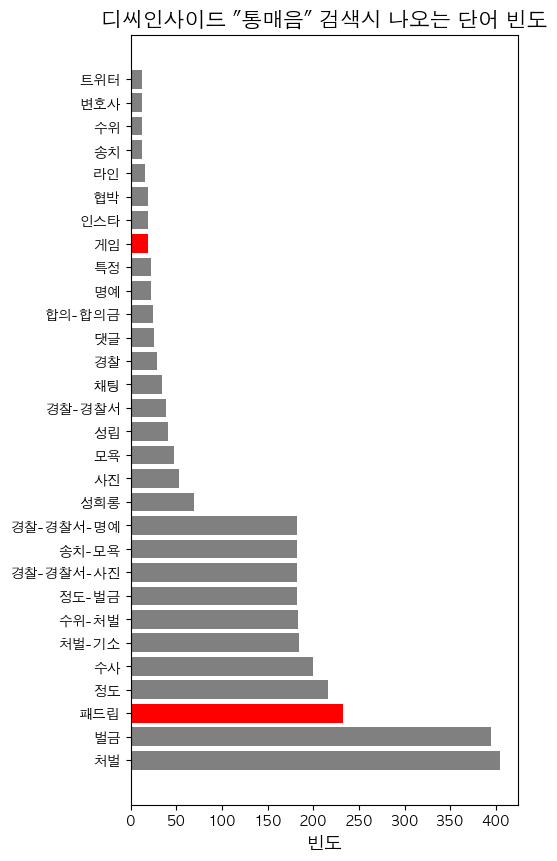

In [188]:
x = df['label'].value_counts()[1:31].index
y = df['label'].value_counts()[1:31].values

highlight_labels = ['게임', '패드립']
colors = ['red' if any(h in label for h in highlight_labels) else 'gray' for label in x]

plt.figure(figsize=(5, 10))
plt.title('디씨인사이드 "통매음" 검색시 나오는 단어 빈도', size=15)
plt.barh(x, y, color=colors)
plt.xlabel('빈도', size=13)

In [189]:
# 주요 키워드 TFIDF
# 각자 변수 값들  중에 하나만 있어도 count 
game = " ".join(df[df['모든글_한글'].str.contains('게임|패드립', na=False)]['모든글_한글'].tolist())

police = " ".join(df[df['모든글_한글'].str.contains('처벌|수사|벌금|경찰|송치|기소|혐의|재판', na=False)]['모든글_한글'].tolist())

shame = " ".join(df[df['모든글_한글'].str.contains('명예|명예훼손|협박|모욕|성희롱|능욕', na=False)]['모든글_한글'].tolist())

after = " ".join(df[df['모든글_한글'].str.contains('합의|피해자|반성', na=False)]['모든글_한글'].tolist())

how = " ".join(df[df['모든글_한글'].str.contains('인스타|사진|영상|댓글|채팅|트위터|트윗|라인|카톡|dm|유투브|유튜브|네이버', na=False)]['모든글_한글'].tolist())

standard = " ".join(df[df['모든글_한글'].str.contains('성립|수위|정도|특정', na=False)]['모든글_한글'].tolist())

lawyer = " ".join(df[df['모든글_한글'].str.contains('변호사|법률|선임|법무법인|변호인|소장|전관', na=False)]['모든글_한글'].tolist())


docs = [game, police, shame, after, how, standard, lawyer]

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer().fit(docs)
tfidf_array = tfidf.transform(docs).toarray()
tfidf_voca = tfidf.vocabulary_

df_tfidf = pd.DataFrame(
    tfidf_array, 
    columns = tfidf_voca, 
    index = [
        "게임/욕설",      # game
        "경찰/처벌",        # police
        "명예훼손/모욕/성희롱",     # shame
        "합의/피해자/반성",          # after
        "온라인 채널",             # how
        "성립/수위/정도/특정",       # standard
        "전문 변호인 조력"           # lawyer
    ]
)
df_tfidf.head(1)

,개조선,팩트,좆팔륙,기득권,한년들이,지배해서,괴롭히기,종특,유죄추정,정당방위처벌,...,변호사들을,믿어,정답이라고,생각함,다섯,뽑으며,로톡상에,존재하는,법률사무소,법무법인은
게임/욕설,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000702,0.0,0.0,0.0,0.0


In [192]:
df_tfidf.T

,게임/욕설,경찰/처벌,명예훼손/모욕/성희롱,합의/피해자/반성,온라인 채널,성립/수위/정도/특정,전문 변호인 조력
개조선,0.000000,0.000353,0.000000,0.0,0.000000,0.000781,0.000000
팩트,0.000000,0.000353,0.000000,0.0,0.000000,0.000781,0.000000
좆팔륙,0.000000,0.000000,0.000000,0.0,0.001284,0.000781,0.000000
기득권,0.000000,0.000000,0.000000,0.0,0.000000,0.000941,0.000000
한년들이,0.000000,0.000353,0.001098,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
뽑으며,0.000702,0.000202,0.000628,0.0,0.000735,0.000447,0.010254
로톡상에,0.000000,0.000000,0.000939,0.0,0.001097,0.000000,0.015317
존재하는,0.000000,0.000426,0.000000,0.0,0.000000,0.000000,0.000000
법률사무소,0.000000,0.000000,0.000939,0.0,0.000000,0.000668,0.030633


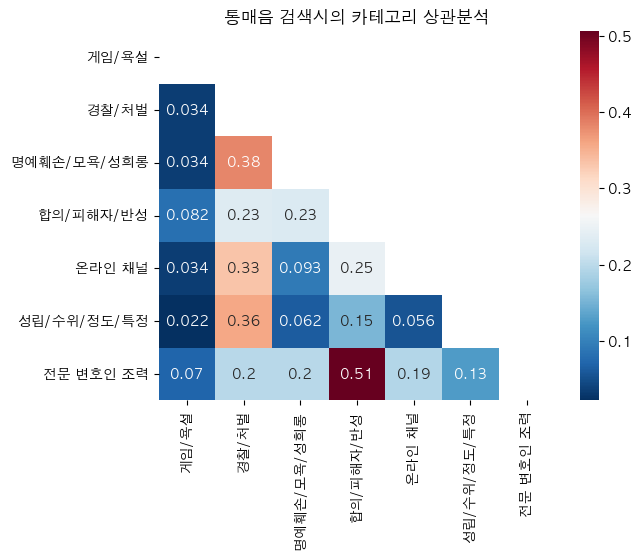

In [193]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

cos_sim = cosine_similarity(df_tfidf)
mask = np.triu(np.ones_like(cos_sim, dtype=bool))    # 절반 가리기 

sns.heatmap(cos_sim, mask = mask , annot=True, xticklabels=df_tfidf.index, yticklabels=df_tfidf.index, cmap="RdBu_r")
plt.title("통매음 검색시의 카테고리 상관분석")
plt.show()

In [194]:
pd.DataFrame(cos_sim, index=df_tfidf.index, columns=df_tfidf.index)

,게임/욕설,경찰/처벌,명예훼손/모욕/성희롱,합의/피해자/반성,온라인 채널,성립/수위/정도/특정,전문 변호인 조력
게임/욕설,1.000000,0.033952,0.034019,0.082215,0.033925,0.022347,0.070022
경찰/처벌,0.033952,1.000000,0.381892,0.233442,0.332785,0.357024,0.197082
명예훼손/모욕/성희롱,0.034019,0.381892,1.000000,0.229067,0.092533,0.062498,0.196500
합의/피해자/반성,0.082215,0.233442,0.229067,1.000000,0.247271,0.154154,0.506252
온라인 채널,0.033925,0.332785,0.092533,0.247271,1.000000,0.056007,0.193246
성립/수위/정도/특정,0.022347,0.357024,0.062498,0.154154,0.056007,1.000000,0.127631
전문 변호인 조력,0.070022,0.197082,0.196500,0.506252,0.193246,0.127631,1.000000


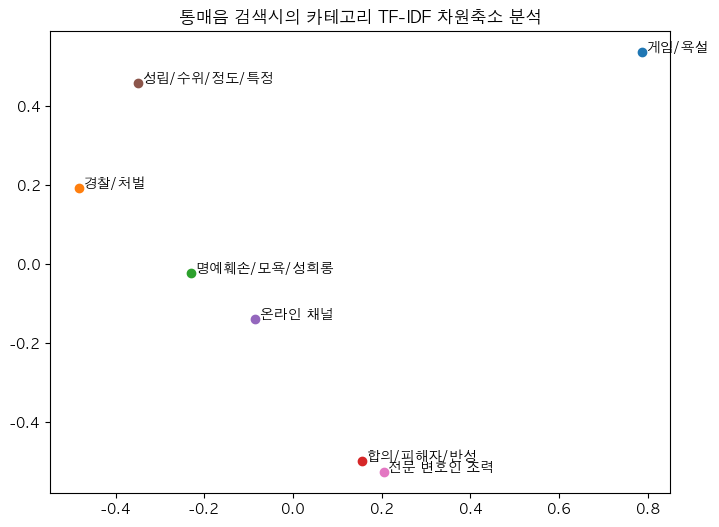

In [195]:
# 6개 카테고리별 유사성 확인 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(df_tfidf)

plt.figure(figsize=(8, 6))
for i, label in enumerate(df_tfidf.index):
    plt.scatter(reduced[i, 0], reduced[i, 1], label=label)
    plt.text(reduced[i, 0]+0.01, reduced[i, 1], label)

plt.title("통매음 검색시의 카테고리 TF-IDF 차원축소 분석")
plt.show()

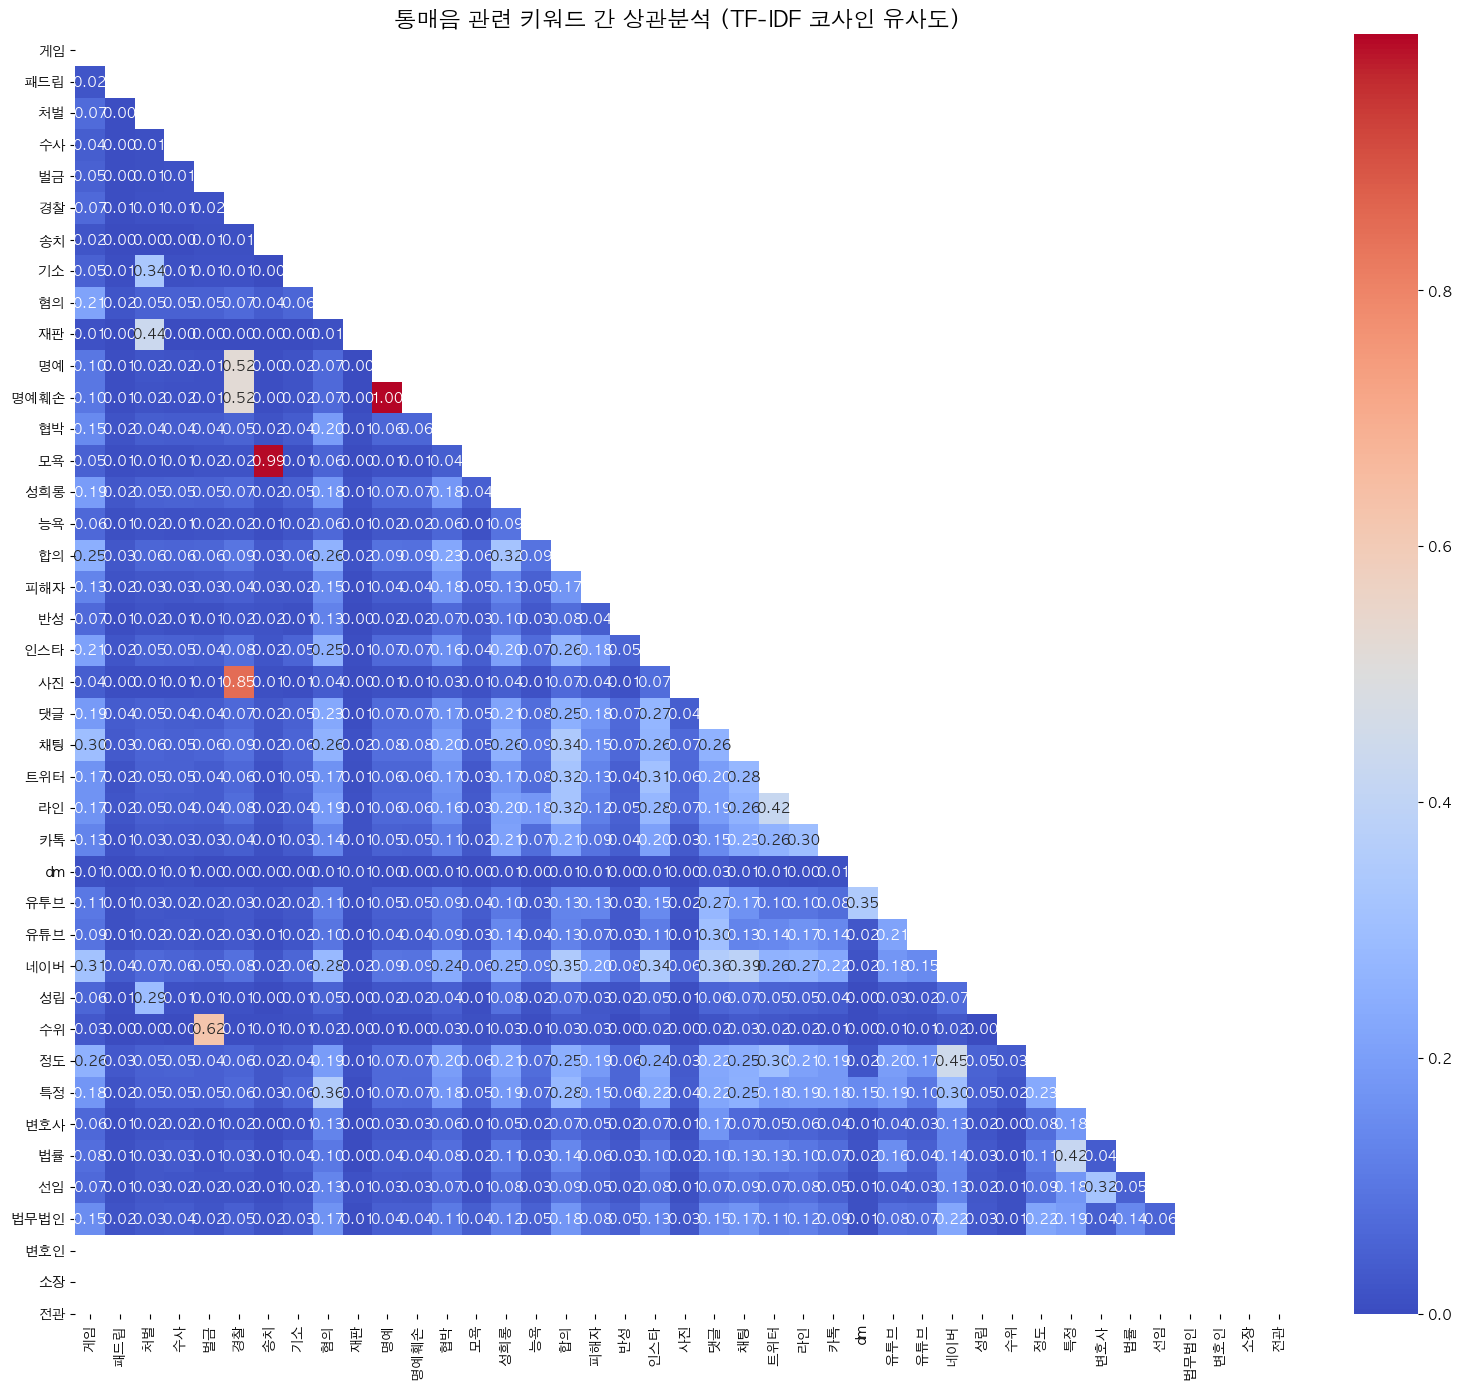

In [198]:
# 키워드 한꺼번에 넣어서 상관분석 

# 1. 키워드 목록
keywords = [
    '게임',  '패드립', 
    '처벌', '수사', '벌금', '경찰', '송치', '기소', '혐의','재판',
    '명예', '명예훼손', '협박', '모욕', '성희롱', '능욕',
    '합의', '피해자', '반성', 
    '인스타', '사진', '댓글', '채팅', '트위터', '라인','카톡','dm','유투브','유튜브','네이버',
    '성립', '수위', '정도', '특정' ,
    '변호사','법률','선임','법무법인','변호인','소장','전관',
    
]

# 2. 각 키워드별 텍스트 추출
docs_all = []
valid_keywords = []

for word in keywords:
    filtered_text = " ".join(df[df['모든글_한글'].str.contains(word, na=False)]['모든글_한글'].tolist())
    if filtered_text.strip():  # 내용이 있을 때만 추가
        docs_all.append(filtered_text)
        valid_keywords.append(word)


# 3. TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(docs_all)

# 4. 코사인 유사도
cos_sim_all = cosine_similarity(tfidf_matrix)

# 5. 상관행렬 시각화
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(cos_sim_all, dtype=bool))

sns.heatmap(cos_sim_all, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=keywords, yticklabels=keywords)
plt.title("통매음 관련 키워드 간 상관분석 (TF-IDF 코사인 유사도)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [199]:
pd.DataFrame(cos_sim_all, index=valid_keywords, columns=valid_keywords).head()

,게임,패드립,처벌,수사,벌금,경찰,송치,기소,혐의,재판,...,네이버,성립,수위,정도,특정,변호사,법률,선임,법무법인,소장
게임,1.000000,0.023084,0.070413,0.039489,0.048407,0.068953,0.022994,0.049822,0.211477,0.013199,...,0.091320,0.314091,0.059672,0.029185,0.255409,0.175931,0.064830,0.080934,0.068934,0.153561
패드립,0.023084,1.000000,0.004863,0.004718,0.004192,0.006696,0.002495,0.005008,0.021855,0.000710,...,0.010421,0.039041,0.005667,0.002252,0.027477,0.019414,0.006208,0.009719,0.007855,0.018409
처벌,0.070413,0.004863,1.000000,0.010199,0.008882,0.013746,0.002877,0.335162,0.049355,0.435333,...,0.021375,0.067085,0.294400,0.004706,0.048615,0.045990,0.018253,0.025157,0.025542,0.031898
수사,0.039489,0.004718,0.010199,1.000000,0.011985,0.012632,0.003395,0.010753,0.048124,0.001162,...,0.024375,0.057065,0.012047,0.003776,0.051402,0.045942,0.018891,0.031390,0.020389,0.036640
벌금,0.048407,0.004192,0.008882,0.011985,1.000000,0.015312,0.011019,0.012053,0.050412,0.000766,...,0.017132,0.045207,0.008761,0.622264,0.044574,0.045668,0.009268,0.013809,0.018190,0.021604


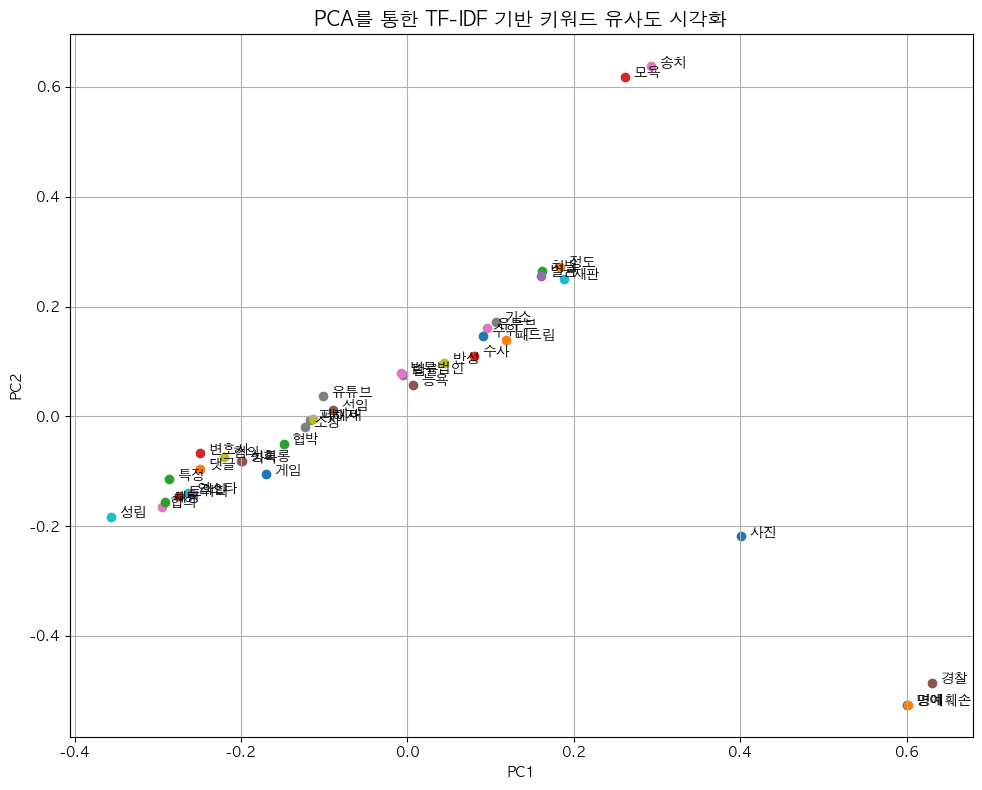

In [200]:
# 차원축소 --> 6개 카테고리별 유사성 확인 

from sklearn.decomposition import PCA

# PCA 차원 축소 (2차원)
pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf_matrix.toarray())  # sparse matrix → dense 배열로 변환 필요

# 산점도 시각화
plt.figure(figsize=(10, 8))
for i, label in enumerate(valid_keywords):  # valid_keywords로 사용
    plt.scatter(reduced[i, 0], reduced[i, 1], label=label)
    plt.text(reduced[i, 0] + 0.01, reduced[i, 1], label, fontsize=10)

plt.title("PCA를 통한 TF-IDF 기반 키워드 유사도 시각화", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


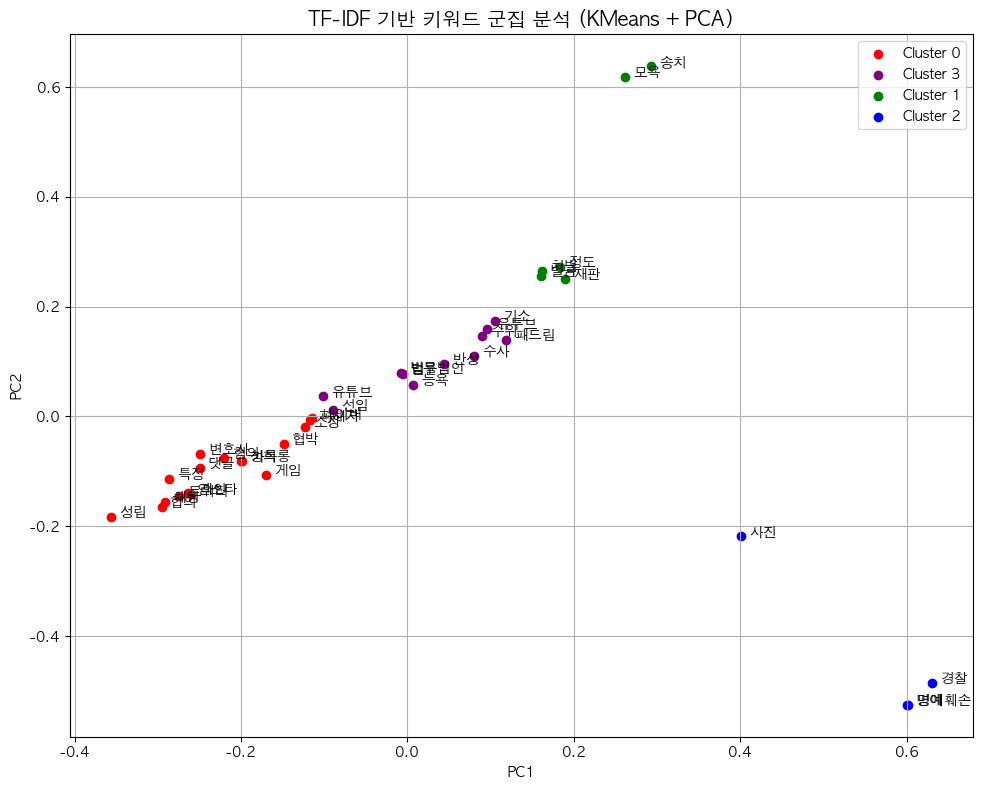

In [201]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. PCA 차원 축소 (2차원)
pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf_matrix.toarray())

# 2. KMeans 클러스터링 (클러스터 수는 예시로 4개 지정)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
labels = kmeans.fit_predict(reduced)

# 3. 군집 결과 시각화
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'purple', 'orange']

for i in range(len(reduced)):
    plt.scatter(reduced[i, 0], reduced[i, 1], 
                color=colors[labels[i] % len(colors)], 
                label=f"Cluster {labels[i]}" if f"Cluster {labels[i]}" not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(reduced[i, 0] + 0.01, reduced[i, 1], valid_keywords[i], fontsize=10)

plt.title("TF-IDF 기반 키워드 군집 분석 (KMeans + PCA)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [202]:
from sklearn.cluster import KMeans

# 결과를 DataFrame으로 정리
df_clusters = pd.DataFrame({
    '키워드': valid_keywords,
    '군집번호': labels
})

# 군집번호 기준으로 정렬 (선택사항)
df_clusters = df_clusters.sort_values(by='군집번호').reset_index(drop=True)

print(df_clusters)


     키워드  군집번호
0     게임     0
1    변호사     0
2     특정     0
3     성립     0
4    네이버     0
5     카톡     0
6     라인     0
7    트위터     0
8     채팅     0
9     댓글     0
10   인스타     0
11   피해자     0
12    합의     0
13   성희롱     0
14    소장     0
15    협박     0
16    혐의     0
17    재판     1
18    송치     1
19    모욕     1
20    벌금     1
21    처벌     1
22    정도     1
23  명예훼손     2
24    명예     2
25    사진     2
26    경찰     2
27    능욕     3
28    선임     3
29    법률     3
30   패드립     3
31   유투브     3
32    수사     3
33   유튜브     3
34    기소     3
35  법무법인     3
36    수위     3
37    반성     3


In [203]:
# 온라인 주요매채별 매주요 키워드 TFIDF
# 각자 변수 값들  중에 하나만 있어도 count 
insta = " ".join(df[df['모든글_한글'].str.contains('인스타|인스타그램|dm|insta|instagram|디엠|DM', na=False)]['모든글_한글'].tolist())

twitter = " ".join(df[df['모든글_한글'].str.contains('트윗|트위터|구트윗|twit|twitter', na=False)]['모든글_한글'].tolist())

dc = " ".join(df[df['모든글_한글'].str.contains('디씨|dc|디시|갤', na=False)]['모든글_한글'].tolist())

kakao = " ".join(df[df['모든글_한글'].str.contains('오카방|카톡', na=False)]['모든글_한글'].tolist())

docs2 = [insta, twitter, dc, kakao]

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer().fit(docs2)
tfidf_array2 = tfidf2.transform(docs2).toarray()
tfidf_voca2 = tfidf2.vocabulary_

tfidf2 = pd.DataFrame(
    tfidf_array2, 
    columns = tfidf_voca2, 
    index = [
        "인스타그램",      # game
        "트위터",        # police
        "디씨갤",     # shame
        "카카오톡",          # after
    ]
)
tfidf2.head(1)

,텔레,몸캠,이러는데,인스타,해킹당해서,이렇다,하면,상관없으려나,내사진도,아니고,...,뭐야,할래,단발성일,경우와,다발성,성희롱에,속하는가,카톡탈퇴,나간경우,특정이되서
인스타그램,0.0,0.0,0.04633,0.024351,0.0,0.0,0.0,0.088715,0.0,0.0,...,0.0,0.0,0.0,0.0,0.015443,0.0,0.015443,0.0,0.0,0.0


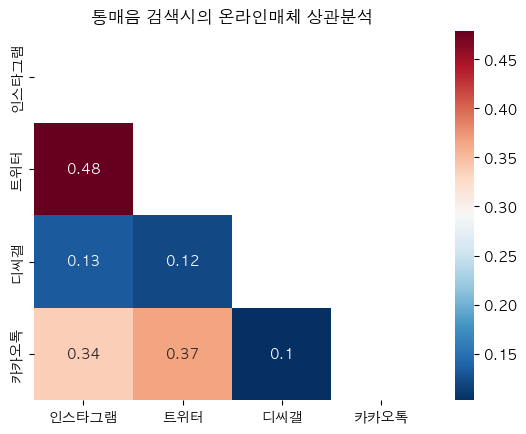

In [204]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

cos_sim2 = cosine_similarity(tfidf2)
mask = np.triu(np.ones_like(cos_sim2, dtype=bool))    # 절반 가리기 

sns.heatmap(cos_sim2, mask = mask , annot=True, xticklabels=tfidf2.index, yticklabels=tfidf2.index, cmap="RdBu_r")
plt.title("통매음 검색시의 온라인매체 상관분석")
plt.show()

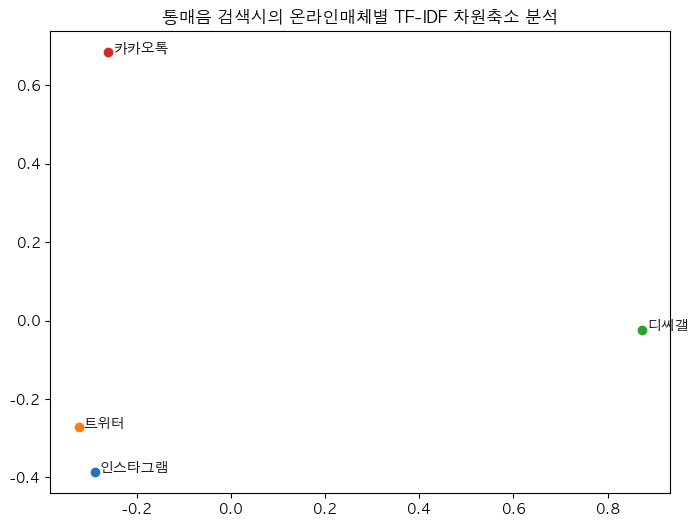

In [205]:
# 온라인채널별 유사성 확인 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf2)

plt.figure(figsize=(8, 6))
for i, label in enumerate(tfidf2.index):
    plt.scatter(reduced[i, 0], reduced[i, 1], label=label)
    plt.text(reduced[i, 0]+0.01, reduced[i, 1], label)

plt.title("통매음 검색시의 온라인매체별 TF-IDF 차원축소 분석")
plt.show()